#**Car Price Prediction**



The goal of this project is to predict the price of cars using Machine Learning. The algorithm that is used here to decide the price of the cars.The prices of new cars in the industry is fixed by the manufacturer. So, customers buying a new car can be assured of the money they invest to be worthy.


1- Data understanding and exploration

2- Data cleaning

3- Data preparation: Feature Engineering and Scaling

4- Feature Selection using RFE and Model Building

5- Linear Regression Assumptions Validation and Outlier Removal

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
os.chdir('/content/drive/MyDrive/Dataset')

In [7]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.metrics import mean_squared_error


##**Read dataset**
I'll read the dataset and get information about it.

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/cars_price.csv', index_col=0)
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [9]:
#shape of the data
df.shape

(40000, 12)

# New section

##**OBSERVATION**

Minimum Price of Car is 95 USD and maximum price is 

*   Minimum Price of Car is 95 USD and maximum price is 
*   195000 USD.
*   Given Data is from 1938 to 2019.


In [10]:
#info the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


In [11]:
#describe the data
df.describe(percentiles = [0.10,0.25,0.50,0.75]).T

,count,mean,std,min,10%,25%,50%,75%,max
priceUSD,40000.0,7430.383775,8338.242134,95.0,1050.0,2350.0,5350.0,9850.0,195000.0
year,40000.0,2003.485625,8.114896,1938.0,1993.0,1998.0,2004.0,2010.0,2019.0
mileage(kilometers),40000.0,243433.200218,316703.266582,0.0,53300.0,137000.0,228000.0,308761.0,9999999.0
volume(cm3),39970.0,2103.201676,938.724653,500.0,1400.0,1600.0,1995.0,2300.0,20000.0


Find missing values.

In [12]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

##**Data Cleaning:**

Find the number of duplicates in dataset.

In [13]:
df.duplicated().sum()

49

As we can see, there are 45 duplicate rows in this dataset which I will remove from the dataset.

In [14]:
#removing the duplicates in the data
df.drop_duplicates(keep=False,inplace=True)

Replace the missing values in column "volume(cm3)" awith median

In [15]:
df['volume(cm3)'].median()

1995.0

In [16]:
df['volume(cm3)'].fillna(df['volume(cm3)'].median(),inplace=True)

Find missing values.

In [17]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)               0
color                     0
transmission              0
drive_unit             1343
segment                3749
dtype: int64

Drop all the missing values from Dataset.

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()
#verfying for any null values

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

As we can notice from the boxplots, we don't only have very low points but we also have a lot of high points.

In order to detect and remove outliers we are going to use a technique called "IQR score technique".

#**Exploratory Data Analysis (EDA)**

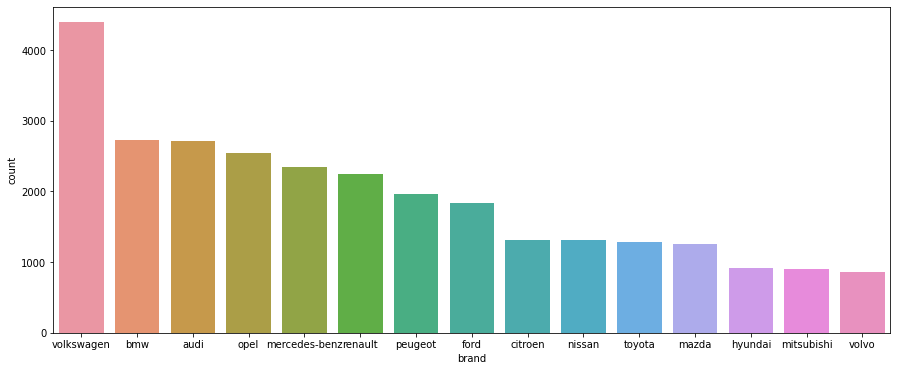

In [20]:
cars = df.groupby('make')['model'].count().reset_index().sort_values('model',ascending = False).head(15)
cars = cars.rename(columns = {'make':'brand','model':'count'})
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(data=cars, x='brand',y='count', ax=ax)

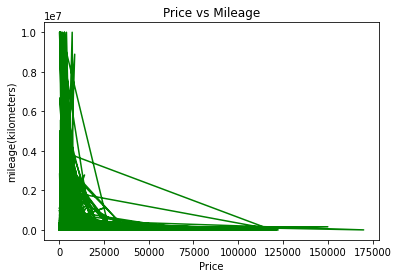

In [21]:
plt.plot(df['priceUSD'],df['mileage(kilometers)'],color='green')
plt.title('Price vs Mileage')
plt.xlabel('Price')
plt.ylabel('mileage(kilometers)')
plt.show()

As we see through the graph that if we increase price then mileage decrease. It's called negative correlation.

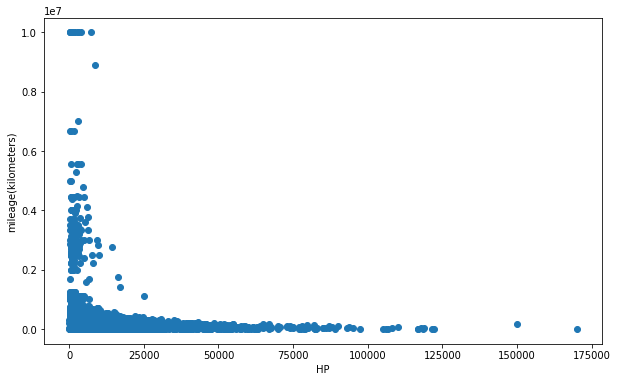

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['priceUSD'], df['mileage(kilometers)'])
ax.set_xlabel('HP')
ax.set_ylabel('mileage(kilometers)')
plt.show()

Text(0.5, 0, 'Year')

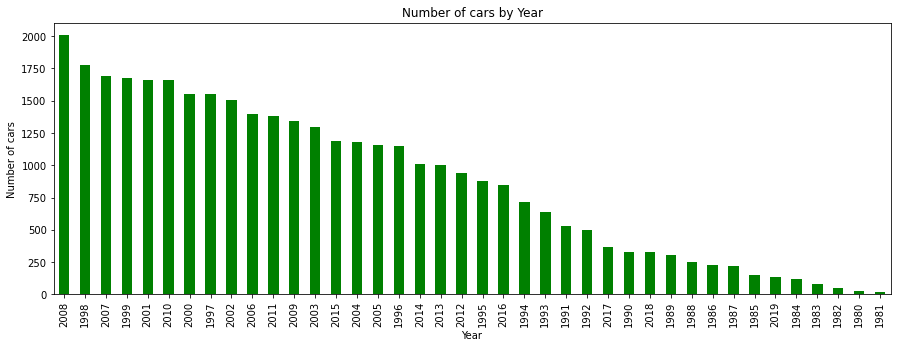

In [23]:
df['year'].value_counts().nlargest(40).plot(kind='bar', figsize=(15,5), color='green')
plt.title("Number of cars by Year")
plt.ylabel("Number of cars")
plt.xlabel("Year")

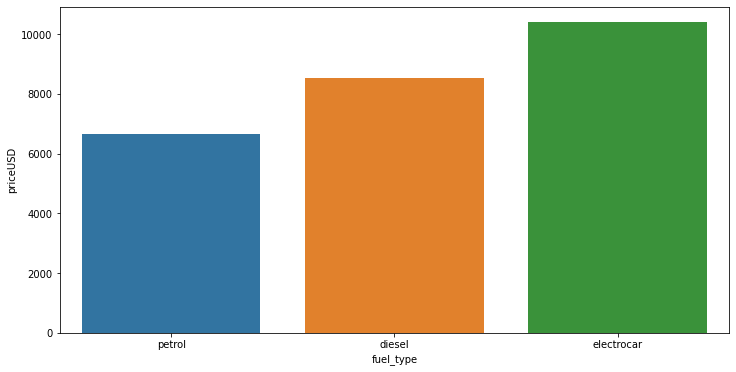

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['priceUSD'], x=df['fuel_type'], ci=None)

As, we see electrocar is more expensive as compare to others.

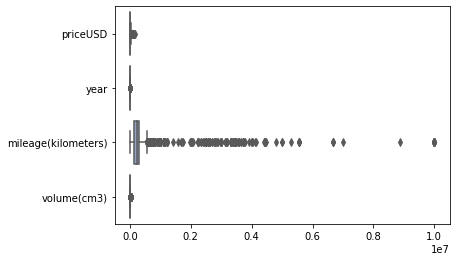

In [25]:
sns.boxplot(data=df,orient='h',palette='Set2')
#checking for any outliers in the data


As we can notice from the boxplots, we don't only have very low points but we also have a lot of high points.

In order to detect and remove outliers we are going to use a technique called "IQR score technique".

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

priceUSD                 7400.00
year                       12.00
mileage(kilometers)    170239.75
volume(cm3)               700.00
dtype: float64


In [27]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(31367, 12)

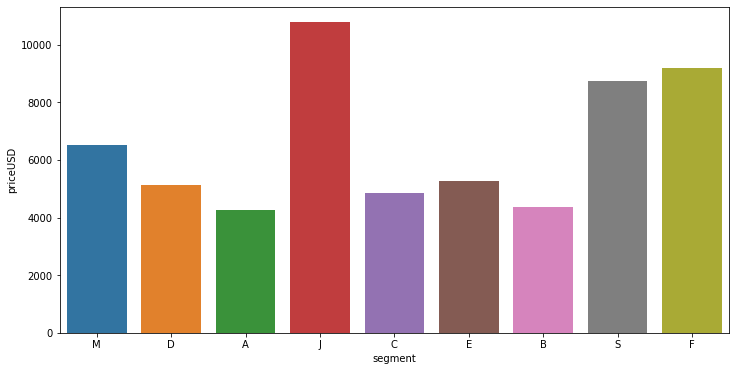

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['segment'], y=df['priceUSD'],ci=None)

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.798378,-0.349265,0.225263
year,0.798378,1.000000,-0.431175,-0.069523
mileage(kilometers),-0.349265,-0.431175,1.000000,0.233136
volume(cm3),0.225263,-0.069523,0.233136,1.000000


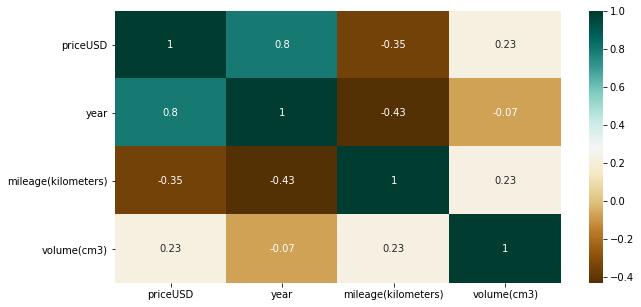

In [31]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In the above heat map we know that the price feature depends mainly on the year and the mileage as positive and negative corelation respectively.

Now we remove make and model column from dataset, because they don't have too much effect on price of the car.

In [32]:
df = df.iloc[:,2:]
df.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
1,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
5,18900,2016,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J


#Working with Categorial Data

we convert the categorical data into scalar form

As for now we have left with only 6 categorical features:

*   condition
*   Fuel_Type
*   transmission
*   segment
*   color
*   drive_unit

For handeling categorical data.In this case we will use pandas get_dummies feature for handling categorical data.

In [33]:
#creating dummies
df = pd.get_dummies(df, drop_first = True)
df.head()

,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
1,5550,2008,172000.0,1400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,8300,2008,223000.0,2500.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,3300,2005,140000.0,1200.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,2450,2002,413000.0,2200.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
5,18900,2016,148000.0,1600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


Now we categorise target value and trained value.

In [34]:
x = df.iloc[:,1:]
y = df.iloc[:, :1]

#**Training and predicting**


First we are spliting the data to train and test for the model

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25093, 31)
(25093, 1)
(6274, 31)
(6274, 1)


###**Linear Regressor**

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.7803897514010609
Testing Accuracy : 0.7664841596108962


###**Random Forest Regressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train,y_train)

# Predicting the test set results

y_Pred = regressor.predict(x_test)



In [40]:
# calculating the accuracies
print("Training Accuracy :",regressor.score(x_train,y_train))
print("Testing Accuracy :",regressor.score(x_test,y_test))

Training Accuracy : 0.985348616336841
Testing Accuracy : 0.892236917706086


In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("R2_Score : ", r2_score(y_test,y_Pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_Pred))
print("MAE : ",mean_absolute_error(y_test,y_Pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_Pred)))

R2_Score :  0.892236917706086
Mean Squared Error :  2302532.511646756
MAE :  1035.0023808065916
RSME :  1517.4098034633741


From **Random Forest Regressor** we got a **$89$%** accuracy

#What is p-value?

P-value or probability value or asymptotic significance is a probability value for a given statistical model. P-value gives us the probability of finding an observation under an assumption that a particular hypothesis is true. This probability is used to accept or reject that hypothesis.
#How does p-value help in feature selection?
Removal of different features from the dataset will have different effects on the p-value for the dataset. We can remove different features which have "**p-value>0.05**" and measure the p-value in each case. These measured p-values can be used to decide whether to keep a feature or not.
#Implementation

In [ ]:
#preparing for the backward elimination for having a proper model
import statsmodels.api as sm

In [ ]:
x.columns

Index(['year', 'mileage(kilometers)', 'volume(cm3)', 'condition_with damage',
       'condition_with mileage', 'fuel_type_electrocar', 'fuel_type_petrol',
       'color_blue', 'color_brown', 'color_burgundy', 'color_gray',
       'color_green', 'color_orange', 'color_other', 'color_purple',
       'color_red', 'color_silver', 'color_white', 'color_yellow',
       'transmission_mechanics', 'drive_unit_front-wheel drive',
       'drive_unit_part-time four-wheel drive', 'drive_unit_rear drive',
       'segment_B', 'segment_C', 'segment_D', 'segment_E', 'segment_F',
       'segment_J', 'segment_M', 'segment_S'],
      dtype='object')

In [ ]:
#creating matrix of features by backward elimination
X_opt = x.values
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               priceUSD   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              4552.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:50:36   Log-Likelihood:                     -2.9800e+05
No. Observations:               31367   AIC:                                  5.961e+05
Df Residuals:                   31336   BIC:                                  5.963e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.7548      0.162     35.600      0.000       5.438       6.072
x2            -0.0113      0.000    -65.423      0.000      -0.012      -0.011
x3            -0.4234      0.064     -6.630      0.000      -0.549      -0.298
x4          -148.5886    297.483     -0.499      0.617    -731.666     434.489
x5          2363.5276    211.529     11.174      0.000    1948.923    2778.133
x6          2122.1831   1871.861      1.134      0.257   -1546.738    5791.105
x7         -2020.0046     41.555    -48.610      0.000   -2101.455   -1938.554
x8         -1911.8452     63.596    -30.062      0.000   -2036.496   -1787.194
x9          1414.3995    131.823     10.729      0.000    1156.020    1672.779
x10        -2610.3268    103.471    -25.228      0.000   -2813.133   -2407.520
x11         -492.8795     69.855     -7.056      0.000    -629.798    -355.961
x12        -2983.8196     81.088    -36.798      0.000   -3142.754   -2824.885
x13         -857.6537    315.297     -2.720      0.007   -1475.648    -239.659
x14        -1476.0701     85.920    -17.180      0.000   -1644.477   -1307.663
x15        -2495.6791    174.365    -14.313      0.000   -2837.441   -2153.917
x16        -2319.4450     93.004    -24.939      0.000   -2501.737   -2137.153
x17        -1429.0518     59.278    -24.108      0.000   -1545.238   -1312.865
x18         -455.8215     74.202     -6.143      0.000    -601.260    -310.383
x19        -2180.3576    267.513     -8.150      0.000   -2704.694   -1656.021
x20        -3293.6201     46.614    -70.658      0.000   -3384.985   -3202.256
x21         -905.1768     94.844     -9.544      0.000   -1091.075    -719.279
x22        -1328.8342    108.236    -12.277      0.000   -1540.981   -1116.687
x23        -1090.7177    106.113    -10.279      0.000   -1298.703    -882.732
x24         -288.7540    195.479     -1.477      0.140    -671.901      94.393
x25          400.4257    190.763      2.099      0.036      26.522     774.330
x26          887.8068    192.598      4.610      0.000     510.306    1265.307
x27          881.1101    203.368      4.333      0.000     482.500    1279.720
x28         2360.3682    289.807      8.145      0.000    1792.334    2928.402
x29         3876.1331    204.660     18.939      0.000    3474.991    4277.275
x30         2119.2053    196.542     10.782      0.000    1733.976    2504.435
x31         2338.2709    323.792      7.222      0.000    1703.625    2972.916
==============================================================================
Omnibus:                     1715.387   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2261.129
Skew:                           0.526   Prob(JB):            


Removing the highest p-value("condition_with damage" column) and rewriting the code.

In [ ]:
X_opt = x.drop(['condition_with damage'],axis=1)#[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              4704.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:50:59   Log-Likelihood:                     -2.9800e+05
No. Observations:               31367   AIC:                                  5.961e+05
Df Residuals:                   31337   BIC:                                  5.963e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
year                                      5.7181      0.144     39.701      0.000       5.436       6.000
mileage(kilometers)                      -0.0113      0.000    -65.438      0.000      -0.012      -0.011
volume(cm3)                              -0.4235      0.064     -6.631      0.000      -0.549      -0.298
condition_with mileage                 2437.7797    150.483     16.200      0.000    2142.827    2732.732
fuel_type_electrocar                   2122.9879   1871.838      1.134      0.257   -1545.888    5791.864
fuel_type_petrol                      -2020.0223     41.555    -48.611      0.000   -2101.471   -1938.573
color_blue                            -1911.7300     63.595    -30.061      0.000   -2036.379   -1787.081
color_brown                            1414.7184    131.820     10.732      0.000    1156.345    1673.092
color_burgundy                        -2610.1786    103.469    -25.227      0.000   -2812.982   -2407.375
color_gray                             -492.9831     69.854     -7.057      0.000    -629.899    -356.067
color_green                           -2983.6347     81.086    -36.796      0.000   -3142.566   -2824.704
color_orange                           -858.3298    315.290     -2.722      0.006   -1476.311    -240.348
color_other                           -1476.1093     85.919    -17.180      0.000   -1644.514   -1307.704
color_purple                          -2495.5746    174.363    -14.313      0.000   -2837.332   -2153.817
color_red                             -2318.8676     92.996    -24.935      0.000   -2501.143   -2136.592
color_silver                          -1429.2200     59.276    -24.111      0.000   -1545.403   -1313.037
color_white                            -455.6918     74.201     -6.141      0.000    -601.128    -310.256
color_yellow                          -2180.4924    267.510     -8.151      0.000   -2704.822   -1656.163
transmission_mechanics                -3293.4591     46.612    -70.657      0.000   -3384.820   -3202.098
drive_unit_front-wheel drive           -905.1705     94.843     -9.544      0.000   -1091.066    -719.275
drive_unit_part-time four-wheel drive -1328.8745    108.235    -12.278      0.000   -1541.019   -1116.730
drive_unit_rear drive                 -1090.5893    106.111    -10.278      0.000   -1298.572    -882.607
segment_B                              -289.3984    195.473     -1.481      0.139    -672.533      93.736
segment_C                               400.0476    190.760      2.097      0.036      26.151     773.944
segment_D                               887.2251    192.593      4.607      0.000     509.736    1264.714
segment_E       

Remove the highest p-value("fuel_type_electrocar" column) and rewriting the code

In [ ]:
X_opt = X_opt.drop(['fuel_type_electrocar'],axis=1)
#X_opt = x.values[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              4866.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:51:19   Log-Likelihood:                     -2.9800e+05
No. Observations:               31367   AIC:                                  5.961e+05
Df Residuals:                   31338   BIC:                                  5.963e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
year                                      5.7185      0.144     39.703      0.000       5.436       6.001
mileage(kilometers)                      -0.0113      0.000    -65.437      0.000      -0.012      -0.011
volume(cm3)                              -0.4237      0.064     -6.634      0.000      -0.549      -0.298
condition_with mileage                 2437.7770    150.484     16.200      0.000    2142.823    2732.731
fuel_type_petrol                      -2020.6729     41.551    -48.631      0.000   -2102.115   -1939.231
color_blue                            -1911.6530     63.595    -30.060      0.000   -2036.302   -1787.004
color_brown                            1414.7609    131.821     10.732      0.000    1156.387    1673.135
color_burgundy                        -2610.0265    103.469    -25.225      0.000   -2812.831   -2407.222
color_gray                             -492.9928     69.854     -7.057      0.000    -629.910    -356.076
color_green                           -2983.4640     81.086    -36.794      0.000   -3142.396   -2824.532
color_orange                           -838.4450    314.804     -2.663      0.008   -1455.473    -221.417
color_other                           -1476.0381     85.920    -17.179      0.000   -1644.444   -1307.632
color_purple                          -2495.3978    174.363    -14.311      0.000   -2837.157   -2153.639
color_red                             -2318.6724     92.996    -24.933      0.000   -2500.948   -2136.397
color_silver                          -1428.5129     59.273    -24.101      0.000   -1544.690   -1312.336
color_white                            -455.6600     74.201     -6.141      0.000    -601.097    -310.223
color_yellow                          -2180.3632    267.511     -8.151      0.000   -2704.695   -1656.031
transmission_mechanics                -3294.0980     46.609    -70.675      0.000   -3385.453   -3202.743
drive_unit_front-wheel drive           -904.9148     94.843     -9.541      0.000   -1090.811    -719.019
drive_unit_part-time four-wheel drive -1328.7350    108.235    -12.276      0.000   -1540.880   -1116.590
drive_unit_rear drive                 -1090.6879    106.112    -10.279      0.000   -1298.671    -882.704
segment_B                              -289.3537    195.474     -1.480      0.139    -672.490      93.782
segment_C                               400.1136    190.760      2.097      0.036      26.215     774.012
segment_D                               887.8358    192.593      4.610      0.000     510.346    1265.325
segment_E                               880.7167    203.363      4.331      0.000     482.117    1279.316
segment_F       

Removing the highest p-value(segment_B column) and rewriting the code.

In [ ]:
X_opt = X_opt.drop(['segment_B'], axis=1)
#X_opt = x.values[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              5039.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:52:37   Log-Likelihood:                     -2.9801e+05
No. Observations:               31367   AIC:                                  5.961e+05
Df Residuals:                   31339   BIC:                                  5.963e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
year                                      5.5923      0.116     48.178      0.000       5.365       5.820
mileage(kilometers)                      -0.0113      0.000    -65.428      0.000      -0.012      -0.011
volume(cm3)                              -0.4277      0.064     -6.702      0.000      -0.553      -0.303
condition_with mileage                 2439.6962    150.481     16.213      0.000    2144.748    2734.645
fuel_type_petrol                      -2021.9561     41.543    -48.672      0.000   -2103.382   -1940.531
color_blue                            -1912.2891     63.595    -30.070      0.000   -2036.938   -1787.640
color_brown                            1412.1435    131.812     10.713      0.000    1153.788    1670.499
color_burgundy                        -2609.8973    103.471    -25.223      0.000   -2812.705   -2407.089
color_gray                             -494.9774     69.843     -7.087      0.000    -631.872    -358.083
color_green                           -2984.8794     81.082    -36.813      0.000   -3143.803   -2825.956
color_orange                           -840.2371    314.808     -2.669      0.008   -1457.272    -223.202
color_other                           -1476.7259     85.920    -17.187      0.000   -1645.132   -1308.319
color_purple                          -2493.7346    174.363    -14.302      0.000   -2835.493   -2151.976
color_red                             -2320.3799     92.991    -24.953      0.000   -2502.645   -2138.115
color_silver                          -1429.8216     59.267    -24.125      0.000   -1545.988   -1313.655
color_white                            -457.4958     74.192     -6.166      0.000    -602.915    -312.077
color_yellow                          -2176.4191    267.503     -8.136      0.000   -2700.735   -1652.103
transmission_mechanics                -3297.1450     46.564    -70.809      0.000   -3388.413   -3205.877
drive_unit_front-wheel drive           -905.1918     94.845     -9.544      0.000   -1091.091    -719.292
drive_unit_part-time four-wheel drive -1328.6428    108.237    -12.275      0.000   -1540.792   -1116.494
drive_unit_rear drive                 -1094.0484    106.090    -10.312      0.000   -1301.988    -886.109
segment_C                               662.0449     71.267      9.290      0.000     522.358     801.732
segment_D                              1150.5883     74.732     15.396      0.000    1004.112    1297.065
segment_E                              1145.1917     97.134     11.790      0.000     954.805    1335.579
segment_F                              2625.0013    227.579     11.534      0.000    2178.938    3071.065
segment_J       

In [ ]:
X_opt

,year,mileage(kilometers),volume(cm3),condition_with mileage,fuel_type_petrol,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
1,2008,172000.0,1400.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
2,2008,223000.0,2500.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2005,140000.0,1200.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,2002,413000.0,2200.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
5,2016,148000.0,1600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,2015,117000.0,1600.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
39994,2008,278000.0,2000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
39996,2001,295000.0,2200.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
39997,1999,0.0,2200.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0


#Final Result

We use Random Forest Regressor model to predict the price of cars after apply feature selection using p-value.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_opt,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)
print("Accuracy on Traing set: ",reg.score(X_train,y_train))
print("Accuracy on Testing set: ",reg.score(X_test,y_test))

Accuracy on Traing set:  0.9846193551891512
Accuracy on Testing set:  0.8951024541103084


In [42]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("R2_Score : ", r2_score(y_test,y_Pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_Pred))
print("MAE : ",mean_absolute_error(y_test,y_Pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_Pred)))

R2_Score :  0.892236917706086
Mean Squared Error :  2302532.511646756
MAE :  1035.0023808065916
RSME :  1517.4098034633741


we get a **$89$%** accuracy after apply feature selection using p-value